#Minimos Quadrados


##Importação dos dados para o DataBase



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
routh = "/content/drive/MyDrive/Sistemas De Controle/Roteiro I/Lab_01B/LAB_1B - Página1.csv"
df = pd.read_csv(routh, ',', na_values = '?')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


##Tratamento dos dados:

In [ ]:
med = df['Média.1']
med = np.delete(np.array(med),0)

it1 = df['1ª medição.1']
it1 = np.delete(np.array(it1),0)

it2 = df['2ª medição.1']
it2 = np.delete(np.array(it2),0)

it3 = df['3ª medição.1']
it3 = np.delete(np.array(it3),0)

it4 = df['4ª medição.1']
it4 = np.delete(np.array(it4),0)

it5 = df['5ª medição.1']
it5 = np.delete(np.array(it5),0)

valY = df["Altura h \n(cm)"]
valY = np.delete(np.array(valY),0)

##Atribuição de Dados 

In [ ]:
def Tdata(vet):
  vetS = []
  for i in range(len(vet)):
    vetS.append(float(str(vet[i]).replace(',','.')))
  return vetS

In [ ]:
x = Tdata(med)
y = valY

x1 = Tdata(it1);
x2 = Tdata(it2);
x3 = Tdata(it3);
x4 = Tdata(it4);
x5 = Tdata(it5);



##Funções para utilizar o MNQ:

In [ ]:
def f(x,a,b):
  z = [];
  for i in range(len(x)):
    z.append(a*x[i]+b);
  return z

def err2(z,y):
  err = [];
  for i in range(len(x)):
    err.append((y[i] - z[i])*(y[i] - z[i]));

  for k in range(len(err)):
    err[k]= np.format_float_scientific(err[k], precision = 3, exp_digits=1)
    err[k] = float(err[k])
  
  #err = sum(err);
  return err;

def MNQ(x,y):
  X = np.zeros((len(x),2))
  for (i, j) in enumerate(x):
    X[i] = np.array([j,1])

  a,b = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))

  z = f(x,a,b)
  err = err2(z,y)

  return z, err, a, b

##Teste:


In [ ]:
X = np.zeros((len(x),2))
for (i, j) in enumerate(x):
  X[i] = np.array([j,1])
LinearRegression().fit(X,y).coef_

array([6.08014056, 0.        ])

In [ ]:
R_MNQ = MNQ(x,y)

x1R_MNQ = MNQ(x1,y)
x2R_MNQ = MNQ(x2,y)
x3R_MNQ = MNQ(x3,y)
x4R_MNQ = MNQ(x4,y)
x5R_MNQ = MNQ(x5,y)

##Gráfico:

Text(0.5, -5, 'Erro Quadratico             : 1.502e-2')

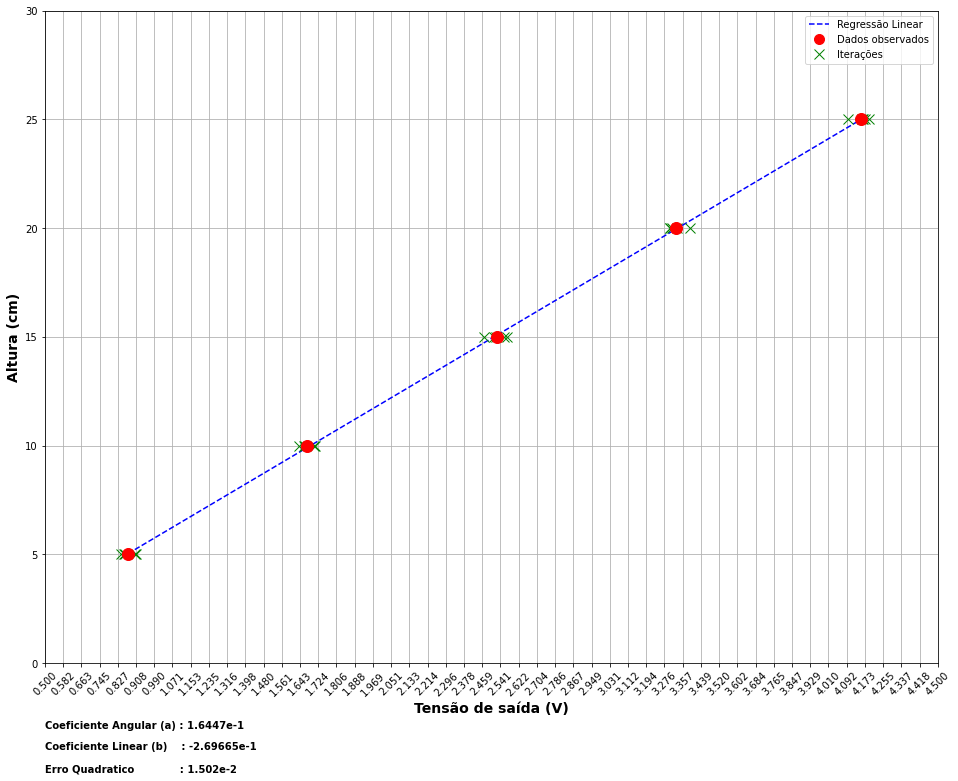

In [ ]:
fig = plt.figure(figsize= (16,12))
#plt.title('Regressão Linear',     fontsize = 18, weight="bold")
plt.ylabel('Altura (cm)',      fontsize = 14, weight="bold")
plt.xlabel('Tensão de saída (V)', fontsize = 14, weight="bold")
plt.grid(True)

plt.xlim(0.5,4.5)
plt.ylim(0,30)
plt.xticks(np.linspace(0.5,4.5,50),rotation=45)

plt.plot(x, R_MNQ[0],'b--')

plt.plot(x,y,"ro",markersize=10)
plt.plot(x1,y,'gx',markersize=10)
plt.plot(x2,y,'gx',markersize=10)
plt.plot(x3,y,'gx',markersize=10)
plt.plot(x4,y,'gx',markersize=10)
plt.plot(x5,y,'gx',markersize=10)

plt.plot(x,y,"ro",markersize=12)

plt.legend(['Regressão Linear', 'Dados observados', 'Iterações'], loc=0)

plt.text(0.5,-3,("Coeficiente Angular (a) : "    + str(np.format_float_scientific(R_MNQ[2], precision = 5, exp_digits=1)))  , fontsize = 10, weight="bold")
plt.text(0.5,-4,("Coeficiente Linear (b)    : "  + str(np.format_float_scientific(R_MNQ[3], precision = 5, exp_digits=1)))  , fontsize = 10, weight="bold")
plt.text(0.5,-5,("Erro Quadratico             : " +    (np.format_float_scientific(sum(R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 10, weight="bold")
#plt.savefig('test.png')

In [ ]:
fig = plt.figure(figsize= (16,12))
#plt.title('Regressão Linear',     fontsize = 18, weight="bold")
plt.ylabel('Altura (cm)',      fontsize = 14, weight="bold")
plt.xlabel('Tensão de saída (V)', fontsize = 14, weight="bold")
plt.grid(True)

plt.xlim(0.5,4.5)
plt.ylim(0,30)

plt.xticks(np.linspace(0.5,4.5,50),rotation=45)
plt.plot(x1, x1R_MNQ[0],'r--')
plt.plot(x2, x2R_MNQ[0],'g--')
plt.plot(x3, x3R_MNQ[0],'b--')
plt.plot(x4, x4R_MNQ[0],'y--')
plt.plot(x5, x5R_MNQ[0],'c--')


plt.legend(['1° Interação', '2° Interação', '3° Interação', '4° Interação', '5° Interação'], loc=0)
plt.text(0.5,-2,("Erro Quadratico 1° Interação: " +    (np.format_float_scientific(sum(x1R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 9)
plt.text(0.5,-3,("Erro Quadratico 2° Interação: " +    (np.format_float_scientific(sum(x2R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 9)
plt.text(0.5,-4,("Erro Quadratico 3° Interação: " +    (np.format_float_scientific(sum(x3R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 9)
plt.text(0.5,-5,("Erro Quadratico 4° Interação: " +    (np.format_float_scientific(sum(x4R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 9)
plt.text(0.5,-6,("Erro Quadratico 5° Interação: " +    (np.format_float_scientific(sum(x5R_MNQ[1]), precision = 3, exp_digits=1)))  , fontsize = 9)
